### Aplicación de Regresión Logística Mltinomial

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [80]:
df=pd.read_csv('persona_hogares_nuevo.csv', sep=',')
df.head()
#data.columns
#data=data.dropna()
#print(data.shape)


/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (96,97,98,99,170,171,175,176,178,179) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,folio,depto,area,nro,genero,edad,dianac,mesnac,anionac,relacionjefehogar,...,yhog,yhogpc,z,zext,pcero,puno,pdos,pextcero,pextuno,pextdos
0,111-00416110273-A-0021,Chuquisaca,Urbana,1,1.Hombre,42,10,2,1977,1.JEFE O JEFA DEL HOGAR,...,3350,558.333312988281,1020.330017,494.549988,Pobre,0.452791452407837,0.205020099878311,No pobre extremo,0,0
1,111-00416110273-A-0031,Chuquisaca,Urbana,1,1.Hombre,44,20,5,1975,1.JEFE O JEFA DEL HOGAR,...,3590,897.5,1020.330017,494.549988,Pobre,0.120382636785507,0.014491979032755,No pobre extremo,0,0
2,151-03374505336-D-0091,Chuquisaca,Rural,6,1.Hombre,4,6,1,2015,3.HIJO/A O ENTENADO/A,...,958.333374023438,119.79167175293,668.099976,381.079987,Pobre,0.820697963237762,0.673545122146606,Pobre extremo,0.685652136802673,0.470118850469589
3,111-00416110273-A-0051,Chuquisaca,Urbana,1,1.Hombre,41,23,11,1978,1.JEFE O JEFA DEL HOGAR,...,3511.39990234375,702.279968261719,1020.330017,494.549988,Pobre,0.311712920665741,0.097164943814278,No pobre extremo,0,0
4,111-00416110273-A-0051,Chuquisaca,Urbana,2,2.Mujer,31,30,8,1988,2.ESPOSA/O O CONVIVIENTE,...,3511.39990234375,702.279968261719,1020.330017,494.549988,Pobre,0.311712920665741,0.097164943814278,No pobre extremo,0,0


In [15]:
list(df.columns)

['folio',
 'depto',
 'area',
 'nro',
 'genero',
 'edad',
 'dianac',
 'mesnac',
 'anionac',
 'relacionjefehogar',
 'idiomauno',
 'idiomados',
 'idiomanativo',
 'estadocivil',
 'dondehace5anios',
 'pertenecepueblooriginario',
 'pueblooriginario',
 'tieneenfermedad',
 'enfermadodocemeses',
 'acudiodocecaja',
 'acudiodocepublico',
 'acudiodoceprivados',
 'acudiodocemisalud',
 'acudiodocedomicilio',
 'acudiodocetradicional',
 'acudiosinreceta',
 'afiliadoseguro',
 'dificultadlentes',
 'dificultadauditivo',
 'dificultadcomunicacion',
 'dificultadapoyocaminar',
 'dificultadconcentracion',
 'dificultadapoyoapoyo',
 'dificultadentenderrealidad',
 'estuvoembarazada',
 'numeroembarazos',
 'hijos',
 'hijosvivos',
 'quienatendioparto',
 'dondeatendioparto',
 'partoatendiocaja',
 'bonoazurduy',
 'treintaactividadfisicatrabajo',
 'treintamcaminatrabajo',
 'ejercicioregular',
 'deportepractica',
 'ininstalaciontipopublico',
 'ininstalaciontipopublicocosto',
 'instalacionprivada',
 'instalacionabierta'

In [81]:
# renombramos la columna condicion laboral
df = df.rename(columns={'condact': 'target'})

#### Análisis Exploratorio de Datos
Escogiendo nuestra variable dependiente
Se desea proyectar la condición laboral de las personas

Text(0, 0.5, 'Frecuencia de personas')

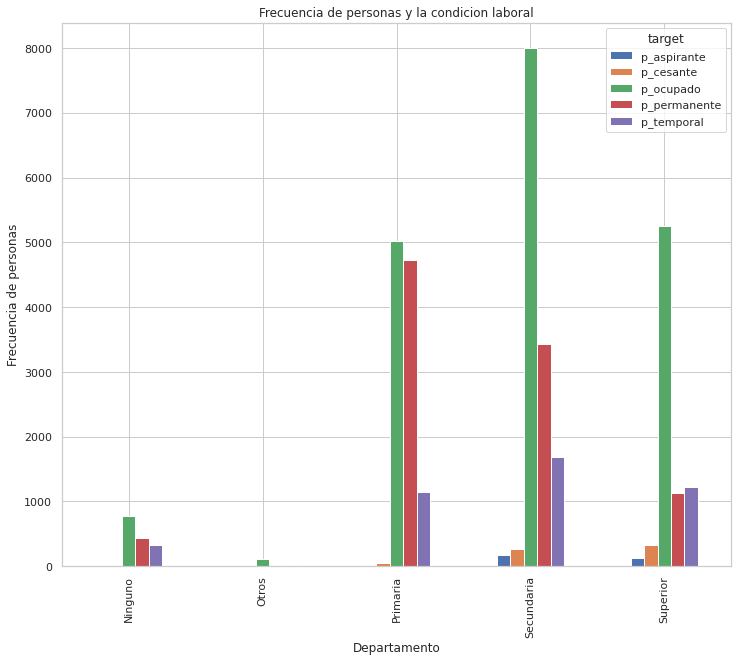

In [82]:
pd.crosstab(df.nivedg, df.target).plot(kind='bar', figsize=(12, 10))
plt.title('Frecuencia de personas y la condicion laboral')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia de personas')
#plt.savefig('purchase_fre_job')

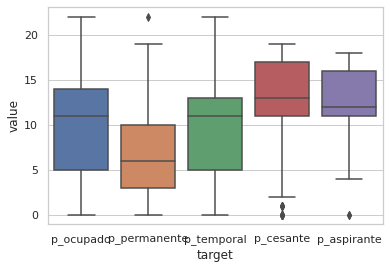

In [83]:
mdf = pd.melt(df[['aestudio','target']], id_vars=['target'], var_name=['aestudio'])  
ax = sns.boxplot(x="target", y="value", data=mdf)
plt.show()

### Recategorización

In [84]:
label_encoder = preprocessing.LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])
#df['edad_e'] = label_encoder.fit_transform(df['edad'])
df['genero_e'] = label_encoder.fit_transform(df['genero'])
df['tipohogar_e'] = label_encoder.fit_transform(df['tipohogar'])
df['razontrabaja_e'] = label_encoder.fit_transform(df['razontrabaja'])
df['cobersalud_e'] = label_encoder.fit_transform(df['cobersalud'])
df['hijos_e'] = label_encoder.fit_transform(df['hijos'])
df['ocupacion_e'] = label_encoder.fit_transform(df['ocupacion'])
df['relacionjefehogar_e'] = label_encoder.fit_transform(df['relacionjefehogar'])
#df['interhouse'] = label_encoder.fit_transform(df['internet_casa'])

df.head()

,folio,depto,area,nro,genero,edad,dianac,mesnac,anionac,relacionjefehogar,...,pextcero,pextuno,pextdos,genero_e,tipohogar_e,razontrabaja_e,cobersalud_e,hijos_e,ocupacion_e,relacionjefehogar_e
0,111-00416110273-A-0021,Chuquisaca,Urbana,1,1.Hombre,42,10,2,1977,1.JEFE O JEFA DEL HOGAR,...,No pobre extremo,0,0,0,1,0,0,0,2,0
1,111-00416110273-A-0031,Chuquisaca,Urbana,1,1.Hombre,44,20,5,1975,1.JEFE O JEFA DEL HOGAR,...,No pobre extremo,0,0,0,4,0,3,0,2,0
2,151-03374505336-D-0091,Chuquisaca,Rural,6,1.Hombre,4,6,1,2015,3.HIJO/A O ENTENADO/A,...,Pobre extremo,0.685652136802673,0.470118850469589,0,1,0,3,0,0,6
3,111-00416110273-A-0051,Chuquisaca,Urbana,1,1.Hombre,41,23,11,1978,1.JEFE O JEFA DEL HOGAR,...,No pobre extremo,0,0,0,4,0,3,0,1,0
4,111-00416110273-A-0051,Chuquisaca,Urbana,2,2.Mujer,31,30,8,1988,2.ESPOSA/O O CONVIVIENTE,...,No pobre extremo,0,0,1,4,0,3,8,2,5


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39605 entries, 0 to 39604
Columns: 187 entries, folio to relacionjefehogar_e
dtypes: float64(6), int64(16), object(165)
memory usage: 56.5+ MB


In [86]:
nomcol = ['edad','genero_e','hijos_e','tipohogar_e', 'cobersalud_e', 'razontrabaja_e', 'relacionjefehogar_e','ocupacion_e', 'ingresoocupacionprincipal', 'aestudio','target']
df1=df[nomcol]
df1.head()

,edad,genero_e,hijos_e,tipohogar_e,cobersalud_e,razontrabaja_e,relacionjefehogar_e,ocupacion_e,ingresoocupacionprincipal,aestudio,target
0,42,0,0,1,0,0,0,2,0,17,2
1,44,0,0,4,3,0,0,2,0,16,2
2,4,0,0,1,3,0,6,0,0,0,5
3,41,0,0,4,3,0,0,1,900,6,2
4,31,1,8,4,3,0,5,2,0,4,2


In [89]:
X=df1[df1.columns[:-1]]
y=df1['target']
X.head()

,edad,genero_e,hijos_e,tipohogar_e,cobersalud_e,razontrabaja_e,relacionjefehogar_e,ocupacion_e,ingresoocupacionprincipal,aestudio
0,42,0,0,1,0,0,0,2,0,17
1,44,0,0,4,3,0,0,2,0,16
2,4,0,0,1,3,0,6,0,0,0
3,41,0,0,4,3,0,0,1,900,6
4,31,1,8,4,3,0,5,2,0,4


In [90]:
# preparacion de la data de aprendizaje y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [91]:
reg = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)
reg.fit(X_train,y_train)
reg

LogisticRegression(n_jobs=-1, random_state=25)

In [92]:
pred=reg.predict(X_test)
reg_cv=cross_val_score(reg, X_train, y_train, cv=10).mean()

In [45]:
print('Coef de determinación: %.3f' % reg.score(X_test, y_test))
print('Cross-validation $R^2$: %0.3f' % reg_cv)
print('Precision: %.3f' % precision_score(y_test, pred, average='micro'))
print('Proporción de verdaderos positivos : %.3f' % recall_score(y_test, pred, average='micro'))
print('Contribución de la precision ponderada(F1 score): %.3f' % f1_score(y_test, pred, average='micro'))
#print("Precision Score : ",precision_score(y_test, y_pred, 
 #                                          pos_label='positive'
  #                                         average='micro'))


Coef de determinación: 0.910
Cross-validation $R^2$: 0.912
Precision: 0.910
Proporción de verdaderos positivos : 0.910
Contribución de la precision ponderada(F1 score): 0.910


In [93]:
y_pred =reg.predict(X_test)
print('Precición de modelo logistico para clasificar segun la data test: {:.2f}'.format(reg.score(X_test, y_test)))

Precición de modelo logistico para clasificar segun la data test: 0.91


### Calculamos la matriz de confusión¶


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0    1    0   89   13    0]
 [   0    7    0  115   79    0]
 [   0    0 5738    1    1    0]
 [   0   11    0 2558  299   54]
 [   0    4    0  362  934    0]
 [   0    0    0   42    0 1574]]


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.30      0.03      0.06       201
           2       1.00      1.00      1.00      5740
           3       0.81      0.88      0.84      2922
           4       0.70      0.72      0.71      1300
           5       0.97      0.97      0.97      1616

    accuracy                           0.91     11882
   macro avg       0.63      0.60      0.60     11882
weighted avg       0.90      0.91      0.90     11882



/home/ivan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
y_test

38345    4
39078    3
7760     2
11134    2
9191     2
        ..
31843    3
9919     2
15367    2
10844    2
35203    4
Name: target, Length: 11882, dtype: int64

In [112]:
reg.predict_proba(X_test)
#reg.predict(X_test)
#roc_auc_score(y_test, reg.predict_proba(X_test), multi_class='ovr')

array([[3.76005697e-04, 1.23923736e-02, 5.30128262e-04, 6.46571599e-01,
        3.40129894e-01, 2.71208720e-47],
       [5.82542944e-03, 8.50023967e-03, 3.00702512e-04, 9.43899231e-01,
        4.14743603e-02, 3.68589620e-08],
       [8.68170214e-10, 1.24434561e-08, 9.99999986e-01, 4.02981773e-11,
        4.17131688e-10, 9.61793417e-72],
       ...,
       [8.77687278e-06, 2.67850013e-05, 9.99962584e-01, 6.64844346e-07,
        1.18964111e-06, 6.37498354e-52],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.58230600e-02, 7.96163798e-02, 6.38515186e-04, 5.65183957e-01,
        3.28738088e-01, 1.42087533e-50]])

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test, classes=['1','2','3','4','5','6'])
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test),multi_class='ovr')
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('pago al mes siguiente')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[3 3 2 ... 2 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.